In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Read whale returns
whale_csvpath = Path("C:/Users/Eric/Desktop/Module 4 challenge/Starter_Code/Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_csvpath)
whale_df["Date"] = pd.to_datetime(whale_df["Date"], dayfirst = True)
whale_df.set_index(whale_df["Date"], inplace=True)
whale_df.drop(columns=["Date"],inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [5]:
# Reading algorithmic returns
algo_csvpath = Path("C:/Users/Eric/Desktop/Module 4 challenge/Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_csvpath)
algo_df["Date"] = pd.to_datetime(algo_df["Date"], dayfirst = True)
algo_df.set_index(algo_df["Date"], inplace=True)
algo_df.drop(columns=["Date"],inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_csvpath = Path("C:/Users/Eric/Desktop/Module 4 challenge/Starter_Code/Resources/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(sp_tsx_csvpath)
sp_tsx_df["Date"] = pd.to_datetime(sp_tsx_df["Date"], dayfirst = True)
sp_tsx_df.set_index(sp_tsx_df['Date'], inplace=True)
sp_tsx_df.drop(columns=['Date'],inplace=True)
sp_tsx_df = sp_tsx_df.sort_values("Date", ascending=True)
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "")
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",","").astype(float) 

C:\Users\Eric\AppData\Local\Temp\ipykernel_14156\3735662906.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "")


In [11]:
# Calculate Daily Returns 
sp_tsx_df_returns = sp_tsx_df.pct_change()
sp_tsx_df_returns.head() 

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [12]:
# Drop nulls
sp_tsx_df_returns.dropna(inplace=True)

In [13]:
# Rename `Close` Column to be specific to this portfolio
sp_tsx_df_returns = sp_tsx_df_returns.rename(columns={"Close": "S&P_TSX"})
sp_tsx_df_returns.head()

,S&P_TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolios_df = pd.concat([whale_df, algo_df, sp_tsx_df_returns], axis="columns", join="inner")  
combined_portfolios_df.head() 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

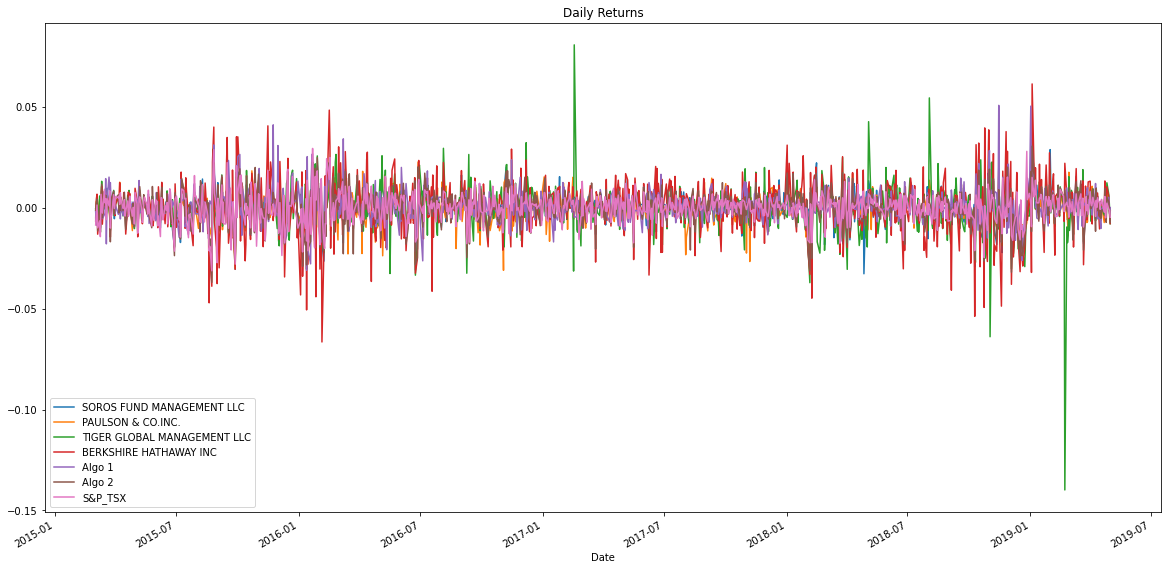

In [15]:
# Plot daily returns of all portfolios
combined_portfolios_df.plot(figsize=(20,10), title="Daily Returns")

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_portfolios_df).cumprod() - 1
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

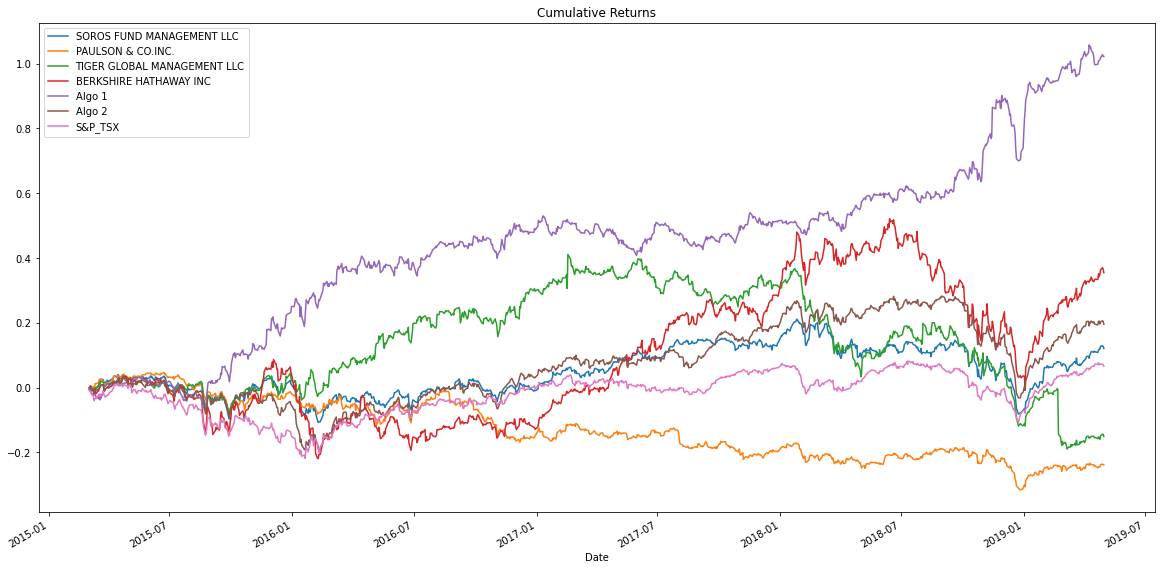

In [17]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns") 

<AxesSubplot:title={'center':'Portfolio Risk'}>

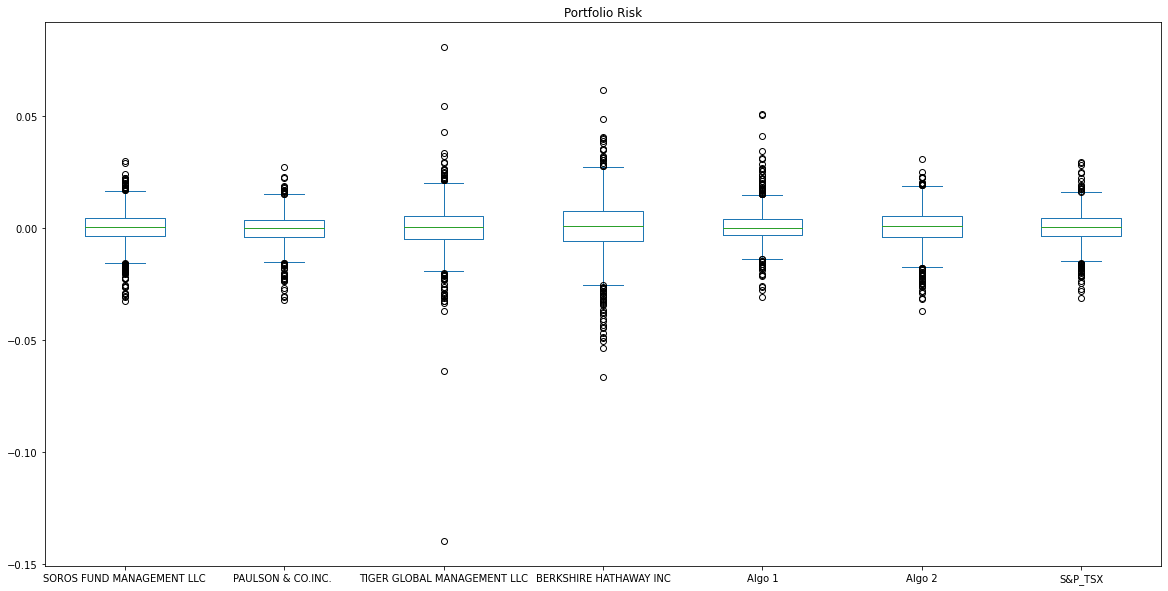

In [18]:
# Box plot to visually show risk
combined_portfolios_df.plot.box(figsize=(20,10), title="Portfolio Risk")

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_portfolios_df.std().sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P_TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_daily_std = sp_tsx_df_returns.std() 
sp_tsx_daily_std

S&P_TSX    0.006637
dtype: float64

In [21]:
# Determine which portfolios are riskier than the S&P TSX 60
portfolios_riskier_than_sp_tsx =[daily_std > daily_std["S&P_TSX"]]
portfolios_riskier_than_sp_tsx

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 Algo 2                          True
 SOROS FUND MANAGEMENT LLC       True
 Algo 1                          True
 S&P_TSX                        False
 PAULSON & CO.INC.              False
 dtype: bool]

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std * np.sqrt(252) 
annual_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P_TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_portfolios_df.rolling(21).std().dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.006583
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.006404
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.006509
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.006596
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.006295
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


<AxesSubplot:title={'center':'21 day rolling standard deviation'}, xlabel='Date'>

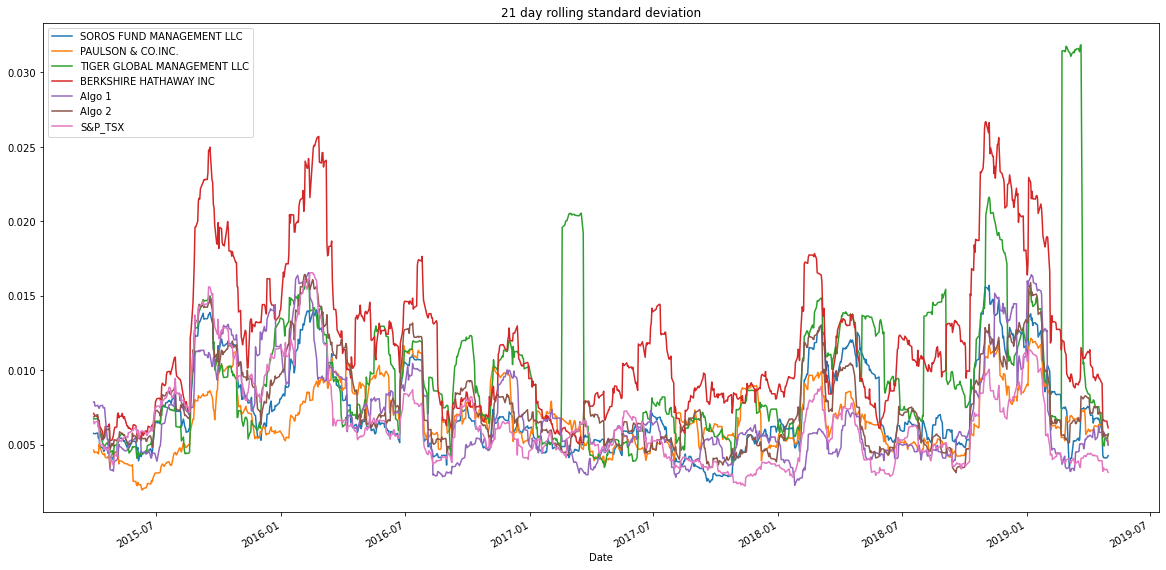

In [24]:
# Plot the rolling standard deviation
combined_portfolios_df.rolling(21).std().plot(title="21 day rolling standard deviation", figsize=(20,10))  

In [85]:
# Calculate the correlation
correlation = combined_portfolios_df.corr() 
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P_TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


In [86]:
# Display de correlation matrix
correlation.style.background_gradient(cmap='coolwarm')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P_TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


In [49]:
# Calculate covariance of a single portfolio
algo1_covariance = combined_portfolios_df["Algo 1"].rolling(window=60).cov(combined_portfolios_df["S&P_TSX"]).dropna()
algo1_covariance

Date
2015-05-28    0.000010
2015-05-29    0.000009
2015-06-01    0.000008
2015-06-02    0.000009
2015-06-03    0.000007
                ...   
2019-04-25    0.000002
2019-04-26    0.000002
2019-04-29    0.000002
2019-04-30    0.000002
2019-05-01    0.000002
Length: 970, dtype: float64

In [50]:
# Calculate variance of S&P TSX
market_variance = combined_portfolios_df["S&P_TSX"].rolling(window=60).var().dropna()
variance

Date
2015-05-28    0.000032
2015-05-29    0.000032
2015-06-01    0.000032
2015-06-02    0.000032
2015-06-03    0.000030
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P_TSX, Length: 970, dtype: float64

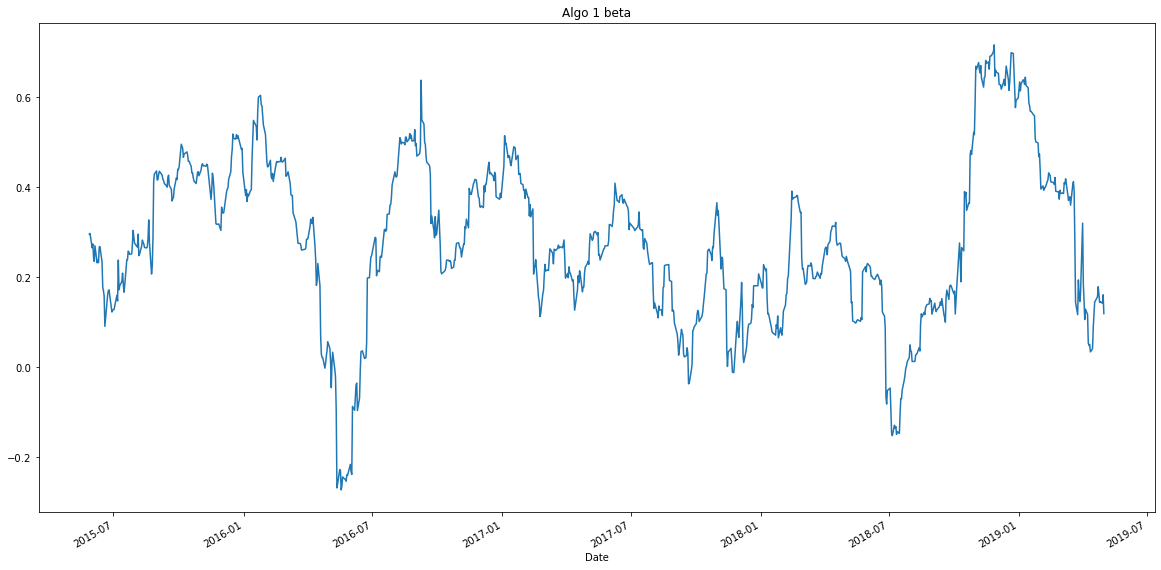

In [51]:
# Computing beta
# Plot beta trend
beta = algo1_covariance/market_variance
beta_plot = beta.plot(title="Algo 1 beta", figsize=(20,10)) 

<AxesSubplot:title={'center':'Exponentially weighted average'}, xlabel='Date'>

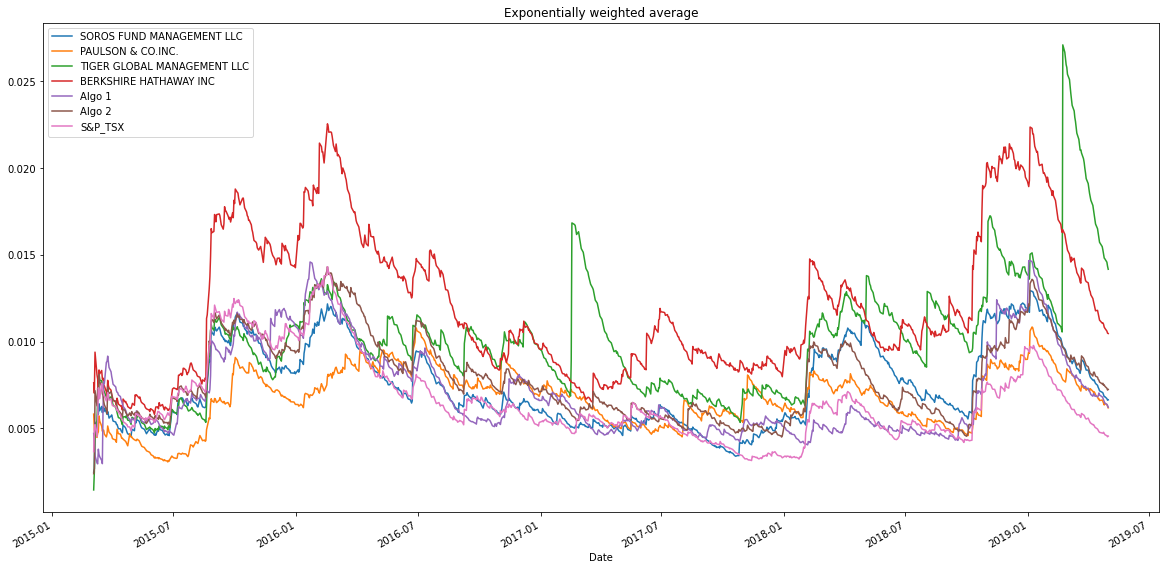

In [52]:
# Use `ewm` to calculate the rolling window
rolling_window_ewm = combined_portfolios_df.ewm(halflife=21).std().plot(title="Exponentially weighted average", figsize=(20,10))
rolling_window_ewm

In [53]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_portfolios_df.mean() *252) / (combined_portfolios_df.std() *np.sqrt(252)) 
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P_TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe ratios'}>

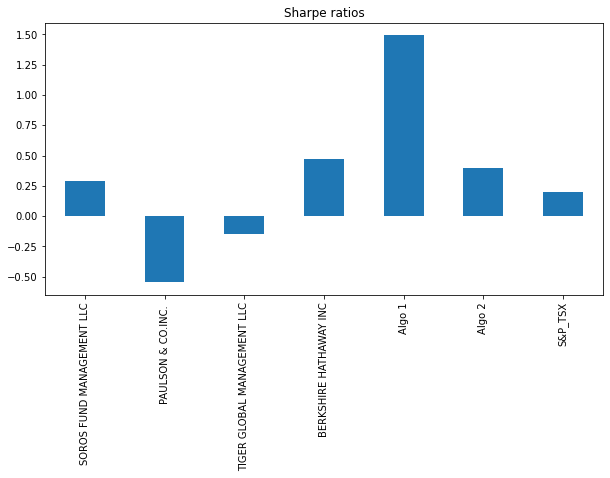

In [56]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe ratios", figsize=(10,5)) 

In [58]:
# Create Custom Portfolio
# Reading data from 1st stock
tsla_csv = Path("C:/Users/Eric/Desktop/module 4 challenge/TSLA.csv") 
tsla_df = pd.read_csv(tsla_csv)
tsla_df["Date"] = pd.to_datetime(tsla_df["Date"], dayfirst = True)
tsla_df.set_index(tsla_df["Date"], inplace=True)
tsla_df.drop(columns=["Date"],inplace=True)
tsla_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-21,624.479980,631.390015,608.880005,620.830017,620.830017,24812700
2021-06-22,618.250000,628.570007,615.500000,623.710022,623.710022,19158900
2021-06-23,632.000000,657.200012,630.039978,656.570007,656.570007,31099200
2021-06-24,674.989990,697.619995,667.609985,679.820007,679.820007,45982400
2021-06-25,689.580017,693.809998,668.700012,671.869995,671.869995,32496700


In [59]:
# Reading data from 2nd stock
nvda_csv = Path("C:/Users/Eric/Desktop/module 4 challenge/NVDA.csv") 
nvda_df = pd.read_csv(nvda_csv)
nvda_df["Date"] = pd.to_datetime(nvda_df["Date"], dayfirst = True)
nvda_df.set_index(nvda_df["Date"], inplace=True)
nvda_df.drop(columns=["Date"],inplace=True)
nvda_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-21,184.352493,185.365005,178.227493,184.272507,184.147141,67238400
2021-06-22,184.714996,189.637497,183.860001,188.867493,188.738998,58014400
2021-06-23,190.077499,191.527496,189.077499,190.572495,190.442841,33235600
2021-06-24,192.277496,194.199997,190.882507,192.054993,191.924347,32092400
2021-06-25,192.804993,193.455002,188.945007,190.309998,190.180527,27836400


In [60]:
# Reading data from 3rd stock
shop_csv = Path("C:/Users/Eric/Desktop/module 4 challenge/SHOP.csv") 
shop_df = pd.read_csv(shop_csv)
shop_df["Date"] = pd.to_datetime(shop_df["Date"], dayfirst = True)
shop_df.set_index(shop_df["Date"], inplace=True)
shop_df.drop(columns=["Date"],inplace=True)
shop_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-21,1473.260010,1552.229980,1452.500000,1480.229980,1480.229980,3254000
2021-06-22,1480.000000,1516.359985,1466.969971,1508.439941,1508.439941,2168000
2021-06-23,1510.930054,1534.958008,1494.300049,1500.530029,1500.530029,1371600
2021-06-24,1513.390015,1529.800049,1473.660034,1478.989990,1478.989990,1340100
2021-06-25,1489.949951,1489.949951,1429.030029,1473.540039,1473.540039,1802400


In [99]:
# Combine all stocks in a single DataFrame
custom_portfolio_df = pd.concat([tsla_df, nvda_df, shop_df], axis="columns", join="inner")  
custom_portfolio_df.head()

,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,
2021-06-21,624.479980,631.390015,608.880005,620.830017,620.830017,24812700,184.352493,185.365005,178.227493,184.272507,184.147141,67238400,1473.260010,1552.229980,1452.500000,1480.229980,1480.229980,3254000
2021-06-22,618.250000,628.570007,615.500000,623.710022,623.710022,19158900,184.714996,189.637497,183.860001,188.867493,188.738998,58014400,1480.000000,1516.359985,1466.969971,1508.439941,1508.439941,2168000
2021-06-23,632.000000,657.200012,630.039978,656.570007,656.570007,31099200,190.077499,191.527496,189.077499,190.572495,190.442841,33235600,1510.930054,1534.958008,1494.300049,1500.530029,1500.530029,1371600
2021-06-24,674.989990,697.619995,667.609985,679.820007,679.820007,45982400,192.277496,194.199997,190.882507,192.054993,191.924347,32092400,1513.390015,1529.800049,1473.660034,1478.989990,1478.989990,1340100
2021-06-25,689.580017,693.809998,668.700012,671.869995,671.869995,32496700,192.804993,193.455002,188.945007,190.309998,190.180527,27836400,1489.949951,1489.949951,1429.030029,1473.540039,1473.540039,1802400


In [100]:
# Reorganize portfolio data by having a column per symbol
# Reset Date index
custom_portfolio_df = custom_portfolio_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
custom_portfolio_df.columns = ['TSLA', 'NVDA', 'SHOP']
custom_portfolio_df.head() 

,TSLA,NVDA,SHOP
Date,,,
2021-06-21,620.830017,184.272507,1480.229980
2021-06-22,623.710022,188.867493,1508.439941
2021-06-23,656.570007,190.572495,1500.530029
2021-06-24,679.820007,192.054993,1478.989990
2021-06-25,671.869995,190.309998,1473.540039


In [101]:
# Calculate daily returns
# Drop NAs
# Display sample data
custom_portfolio_daily_return = custom_portfolio_df.pct_change()
custom_portfolio_daily_return.dropna(inplace=True) 
custom_portfolio_daily_return.head()

,TSLA,NVDA,SHOP
Date,,,
2021-06-22,0.004639,0.024936,0.019058
2021-06-23,0.052685,0.009028,-0.005244
2021-06-24,0.035411,0.007779,-0.014355
2021-06-25,-0.011694,-0.009086,-0.003685
2021-06-28,0.025079,0.050129,0.014557


In [116]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
# Display sample data
custom_portfolio_weighted_returns = custom_portfolio_daily_return.dot(weights) 
custom_portfolio_weighted_returns.head()

Date
2021-06-22    0.016211
2021-06-23    0.018823
2021-06-24    0.009612
2021-06-25   -0.008155
2021-06-28    0.029922
dtype: float64

In [113]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolios_2_df = pd.concat([whale_df, algo_df, sp_tsx_df, custom_portfolio_weighted_returns], axis='columns', join='inner')
combined_portfolios_2_df.set_index("Date") 
combined_portfolios_2_df.head()

KeyError: "None of ['Date'] are in the columns"